## COSC-130 Project 01
 Srivathsav Arumugam
 
 In this project I will be using a given data set to solve coding problems using this data set and will create a linear model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1: Importing and Viewing the Data

We first need to import and view the data.

In [2]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

## This will confirm that each list has 398 values


In [3]:
#This will confirm that each list has 398 values

print('Length of List weight : '+str(len(weight)))
print('Length of List mpg : '+str(len(mpg)))
print('length of list ln_mpg : ' + str(len(ln_mpg)))

Length of List weight : 398
Length of List mpg : 398
length of list ln_mpg : 398


In [4]:
print('Length of List weight : ',(len(weight)))
print('Length of List mpg : ',(len(mpg)))
print('length of list ln_mpg : ',(len(ln_mpg)))

Length of List weight :  398
Length of List mpg :  398
length of list ln_mpg :  398


In [5]:
data=[]
for i in range(0,10):
    a = []
    a.append(weight[i])
    a.append(mpg[i])
    a.append(ln_mpg[i])
    data.append(a)
print(["Weight", "MPG", "LN_MPG"])


['Weight', 'MPG', 'LN_MPG']


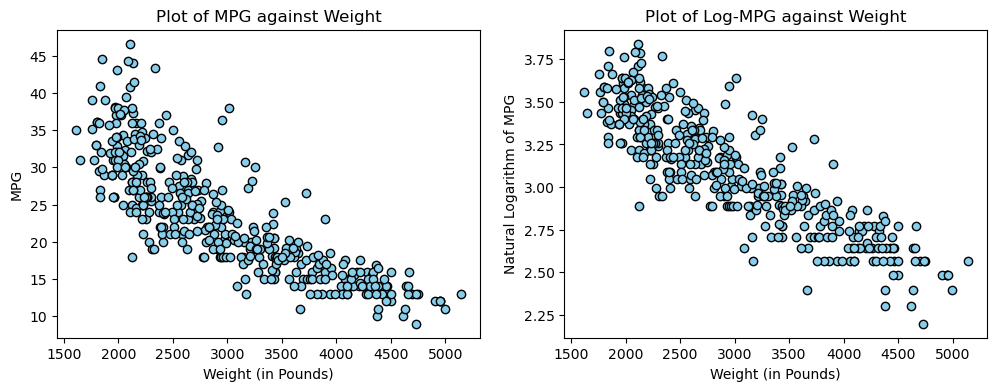

In [6]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')
plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()

## Part 2: Splitting the data

## We will now be splitting the data into train and test sets

In [7]:
x_train = weight[0:300]
x_test = weight[-98:]
y_train = ln_mpg[0:300]
y_test = ln_mpg[-98:]
mpg_train = mpg[0:300]
mpg_test = mpg[-98:]

In [8]:
n_train = len(x_train)
n_test = len(x_test)

In [9]:
print("Training set size: " ,(n_train))
print("Testing set size: " ,(n_test))

Training set size:  300
Testing set size:  98


## We will now create scatter plots to see data in training and test sets

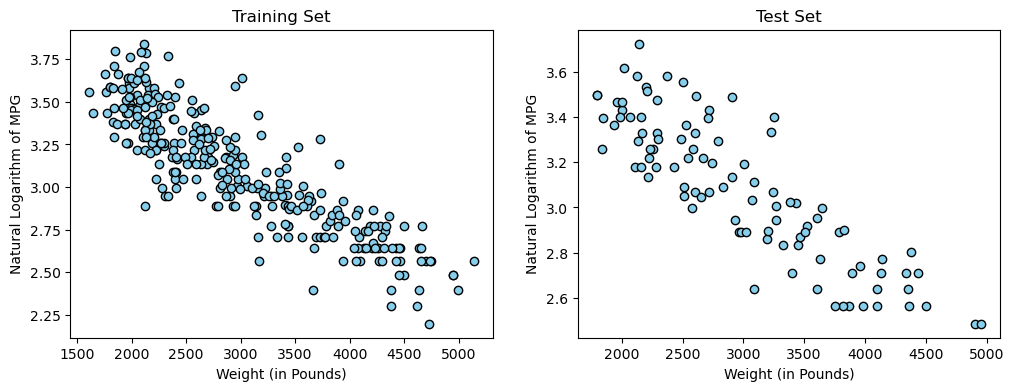

In [10]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive statistics

we will start by calculating the mean of the 𝑋𝑋 values (which represent weight), and the mean of the 𝑌𝑌 values (which represent log-MPG)

In [11]:
mean_x = sum(x_train) / len(x_train)-1
mean_y = sum(y_train)/ len(y_train)

In [12]:
print('Mean of X = {:.2f}'. format(mean_x))
print('Mean of Y = {:.2f}'. format(mean_y))

Mean of X = 2967.62
Mean of Y = 3.11


we will now be calculating sxx and syy

In [13]:
Sxx = sum([((x - mean_x) ** 2) for x in x_train])
Syy = sum([((x - mean_y) ** 2) for x in y_train])

In [14]:
print('Sxx =' + ' ' + str(round(Sxx,2)))
print('Syy =' + ' ' + str(round(Syy,4)))

Sxx = 224007220.44
Syy = 36.0746


Calculating the variance of the training values of X and Y

In [15]:
var_x = sum([((x - mean_x) ** 2) for x in x_train]) / len(x_train)
var_y = sum([((x - mean_y) ** 2) for x in y_train]) / len(y_train)


print('Variance of X =' + ' ' + str(round(var_x,2)))
print('Variance of Y =' + ' ' + str(round(var_y,4)))

Variance of X = 746690.73
Variance of Y = 0.1202


## Part 4: Linear regression Model
in this part we will calculate Sxy, which we will then use to find the
coefficients for our linear regression model.

In [16]:
sxy = 0
for i in range(len(x_train)):
    sxy += (x_train[i] - mean_x) * (y_train[i] - mean_y)
    
print(f'sxy = {round(sxy, 2)}')



sxy = -78999.13


In [17]:
beta_1= sxy/Sxx
beta_0 = mean_y - beta_1 * mean_x
print(f'beta_0 = {round(beta_0, 4)}')
print(f'beta_1 = {round(beta_1, 8)}')

beta_0 = 4.1535
beta_1 = -0.00035266


We will now visaulize the regression line by plotting it on the top of the scatter plots for the training set as well as for the test set

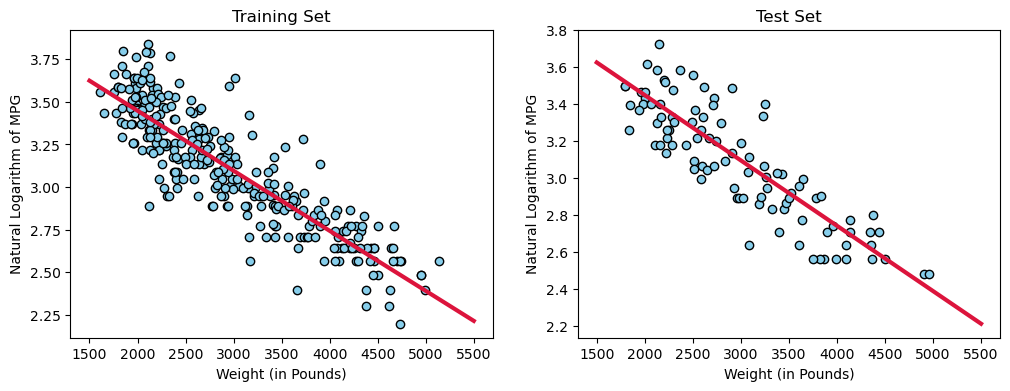

In [18]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training score
We will be calculating the training r-squared score,
and that we will start by calculating estimated response values for the training set

In [19]:
pred_y = []

for i in range (len(x_train)):
    pred_y.append(beta_0+beta_1 * x_train[i])
print(pred_y)

[3.028498236387809, 3.4534575553482254, 2.9509123026357, 2.7146278680270037, 2.908592702407277, 3.5282221824184394, 3.2118831707109763, 3.534570122452703, 3.3818668982951428, 3.393504788357959, 3.222463070768082, 3.4922505222242797, 3.4129012717959863, 3.252086790927978, 2.949148985959516, 3.2411542275356355, 3.370581671567563, 3.4569841887005937, 3.2118831707109763, 3.3423686047486143, 2.8511085787636685, 2.5792051472960495, 3.0175656729954663, 3.2242263874442663, 3.2242263874442663, 2.9417430559195417, 3.3042809645430333, 2.9473856692833316, 3.431945091898777, 2.6973473646003976, 3.4552208720244093, 2.71392254135653, 2.820074205262825, 2.868036418855038, 3.1131374368446556, 3.1431138203397886, 3.3547118214819043, 3.3423686047486143, 2.407458103035699, 3.2034192506652914, 3.506357055633754, 2.945622352607147, 2.8585145088036423, 3.039078136444915, 3.1607469871016316, 3.451694238672041, 2.4963292635153875, 2.4846913734525713, 3.31027624124206, 3.166036937130184, 3.2005979439833965, 3.3

 we will now calculate the residuals for the training set.

In [20]:
error_y_train = []

for i in range(len(x_train)):
    error_y_train.append(y_train[i]-pred_y[i])
print(error_y_train)


[0.2747017636121911, 0.036942444651774764, -0.05501230263569967, 0.14757213197299635, 0.3261072975927233, -0.09422218241843927, 0.09861682928902393, 0.13152987754729706, 0.15323310170485716, 0.007695211642040789, 0.07333692923191792, 0.17134947777572052, -0.1171012717959865, 0.2594132090720218, 0.15995101404048429, -0.19665422753563533, -0.15168167156756285, 0.15391581129940635, 0.13451682928902375, -0.10366860474861417, -0.14300857876366857, 0.05989485270395045, -0.02186567299546649, 0.056673612555733666, 0.22897361255573356, -0.05134305591954158, -0.3085809645430335, 0.2265143307166686, -0.21304509189877674, -0.05824736460039759, 0.1282791279755906, -0.005822541356530042, -0.047474205262824754, 0.04976358114496238, 0.18266256315534424, 0.03498617966021156, 0.1172881785180957, -0.08426860474861408, 0.07744189696430093, -0.06791925066529148, 0.20474294436624607, 0.00927764739285264, -0.025314508803642166, 0.38522186355508525, -0.06974698710163141, 0.014005761327958943, 0.06857073648461

we will be displaying the values mentioned above

In [21]:
print(f'{"True y":>6}{"pred y":>10}{"error":>10}')
print('-'*26)
for i in range(10):
    p = round(pred_y[i],4)
    y = round(y_train[i], 4)
    e = round(error_y_train[i], 4)
    print(f'{y}{p}{e}')

True y    pred y     error
--------------------------
3.30323.02850.2747
3.49043.45350.0369
2.89592.9509-0.055
2.86222.71460.1476
3.23472.90860.3261
3.4343.5282-0.0942
3.31053.21190.0986
3.66613.53460.1315
3.53513.38190.1532
3.40123.39350.0077


In [22]:
SSE_train = 0
for i in range(len(error_y_train)):
    SSE_train = SSE_train + error_y_train[i]**2
print('Training SSE =', round(SSE_train,4))

Training SSE = 8.2145


In [23]:
r2_train = 1 - SSE_train/ Syy
print('Training r-squared =', round(r2_train,4))

Training r-squared = 0.7723


## Part 6: Test score

In [40]:
pred_y_test = [beta_0 + beta_1 * x for x in x_test]

In [41]:
error_y_test = []
for i in range (len(y_test)):
    error_y_test.append(y_train[i]-pred_y[i])



In [42]:
print(error_y_test)

[0.2747017636121911, 0.036942444651774764, -0.05501230263569967, 0.14757213197299635, 0.3261072975927233, -0.09422218241843927, 0.09861682928902393, 0.13152987754729706, 0.15323310170485716, 0.007695211642040789, 0.07333692923191792, 0.17134947777572052, -0.1171012717959865, 0.2594132090720218, 0.15995101404048429, -0.19665422753563533, -0.15168167156756285, 0.15391581129940635, 0.13451682928902375, -0.10366860474861417, -0.14300857876366857, 0.05989485270395045, -0.02186567299546649, 0.056673612555733666, 0.22897361255573356, -0.05134305591954158, -0.3085809645430335, 0.2265143307166686, -0.21304509189877674, -0.05824736460039759, 0.1282791279755906, -0.005822541356530042, -0.047474205262824754, 0.04976358114496238, 0.18266256315534424, 0.03498617966021156, 0.1172881785180957, -0.08426860474861408, 0.07744189696430093, -0.06791925066529148, 0.20474294436624607, 0.00927764739285264, -0.025314508803642166, 0.38522186355508525, -0.06974698710163141, 0.014005761327958943, 0.06857073648461

In [52]:
SSE_test = 0
for e in error_y_test:
    SSE_test += e**2

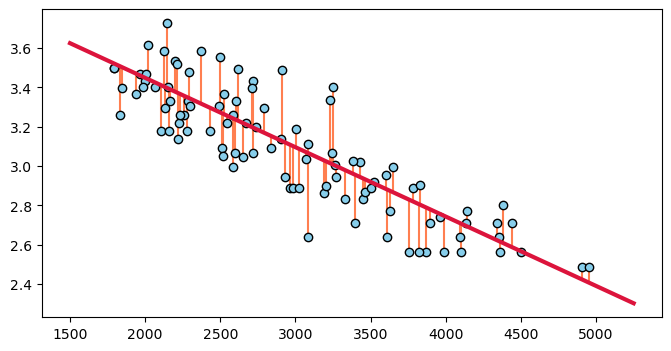

In [54]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250],
          c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]],
             c='coral', zorder=0)
plt.show()

## part 7: Transforming test predictions
We will be calculating estimates for the average MPG for
observations in our test set.

In [62]:
e = 2.718281828


In [68]:
pred_mpg_test = [e**y for y in pred_y_test]

error_mpg_test = [mpg_test[i] - pred_mpg_test[i]]
print("true MPG pred Error")
print("--------------------")
for i in range(len(mpg_test)):
    if i == 10:

SyntaxError: incomplete input (1410066456.py, line 7)

In [67]:
print("{:8.1f}{:12.1f}{:9.1f}").format
(mpg_test[i], pred_mpg_test[i]error_mpg_test[i])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1686329309.py, line 2)